In [1]:
# Librerias

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans

In [2]:
# Cargar la imagen
target = 'Ermine.jpg' #'img2.jpg'#'palette2.png'#
img_original = cv2.cvtColor(cv2.imread(target), cv2.COLOR_BGR2RGB)

 las dimensiones de la variable que se le entrega al algoritmo son: (10560, 3)


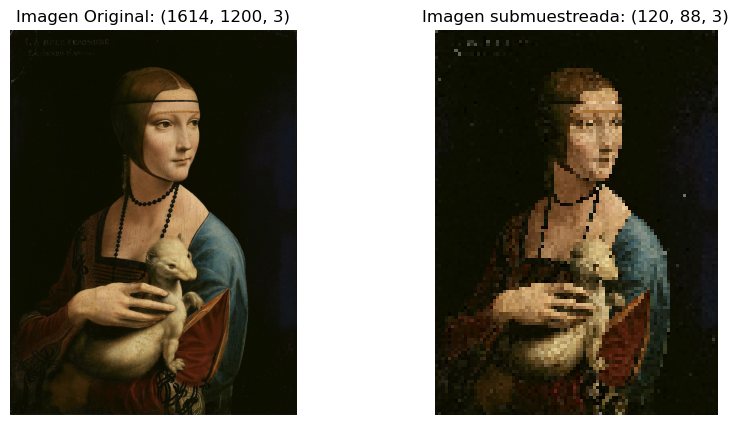

In [3]:
# Pre-procesamiento de la imagen:  

# submuestreo para ahorrar recursos computacionales
nuevo_ancho = 88
nuevo_alto = 120
nuevo_tamanio = (nuevo_ancho, nuevo_alto)

img_submuestreada = cv2.resize(img_original, nuevo_tamanio)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f'Imagen Original: {img_original.shape}')
plt.imshow(img_original)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title(f'Imagen submuestreada: {img_submuestreada.shape}')
plt.imshow(img_submuestreada)
plt.axis('off')

# Transformar al espacio de color CIELAB
img_transformada = cv2.cvtColor(img_submuestreada, cv2.COLOR_RGB2LAB)

# Darle formato a la imagen
img_final = img_transformada.reshape((-1, 3))/255 # No hay que escalar por que se está haciendo aqui teniendo en cuenta el rango definido de RGB
(total_pixels,n) = img_final.shape
print(f' las dimensiones de la variable que se le entrega al algoritmo son: {total_pixels,n}')

In [4]:
def silhouette_plot(X, k_min=2, k_max=5, linkage='ward'):
    """
    Genera la gráfica con el coeficiente de la silueta    
    Parametros:
    X : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    linkage : str
        Criterio de unión. Parámetro de AgglomerativeClustering()
    """
    scores = []
    for i in range(k_min, k_max+1):
        model_k = AgglomerativeClustering(n_clusters=i, linkage=linkage)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_,metric = 'canberra')
        scores.append(score)
        print(f'vuelta {i}')
    
    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clústeres')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()
    return scores

vuelta 3
vuelta 4
vuelta 5
vuelta 6
vuelta 7
vuelta 8
vuelta 9
vuelta 10


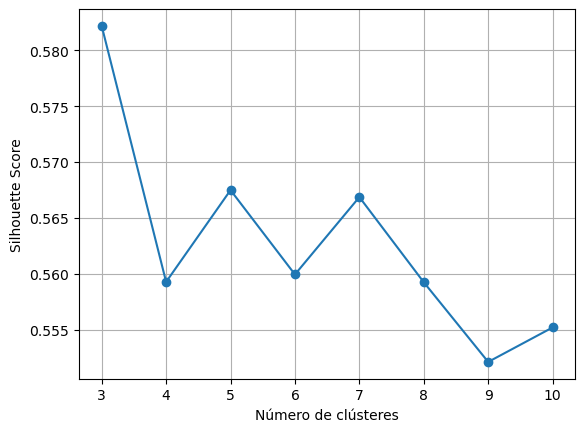

In [5]:
scores_silueta = silhouette_plot(img_final, 3, 10,linkage='average') #TODO: Quitar el texto de vuelta

In [6]:
# Etapa 2: Método de clustering K-Means
agrupador = KMeans(n_clusters = scores_silueta.index(max(scores_silueta))+3, n_init = 10)
agrupador.fit(img_submuestreada.reshape((-1, 3))/255)
colors = abs(agrupador.cluster_centers_) #TODO: Al no ser necesariamente los centroides un color existente, pueden dar ligeramente negativos y se daña la visualizacion 

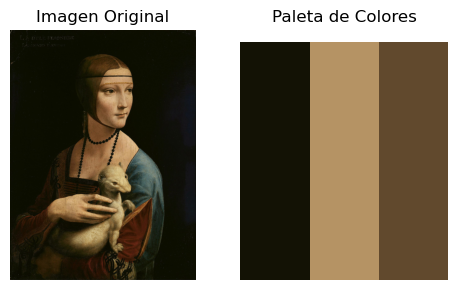

In [7]:
# Mostrar la imagen original junto con su paleta de colores
fig, ax = plt.subplots(1,2,figsize=(5, 3))  

ax[0].imshow(img_original)
ax[0].set_title('Imagen Original')
ax[0].axis('off')
# crear la paleta
for i, color in enumerate(colors):
    ax[1].bar(i, height=1, color=color, edgecolor='none', width=1)

ax[1].set_title('Paleta de Colores')
ax[1].axis('off')
plt.tight_layout()
plt.show()